In [3]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()

X, y = iris.data, iris.target
print ("data=", X, "\ntarget=",y);
from sklearn.decomposition import PCA
'''
Principal component analysis (PCA)

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
'''
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='rainbow')

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

data= [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.

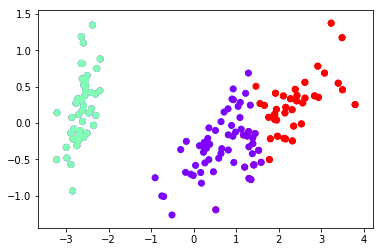

In [4]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='rainbow');

plt.show();

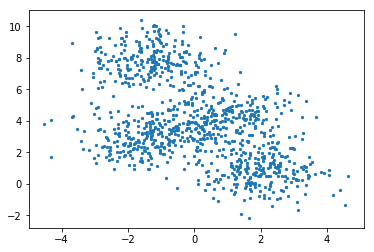

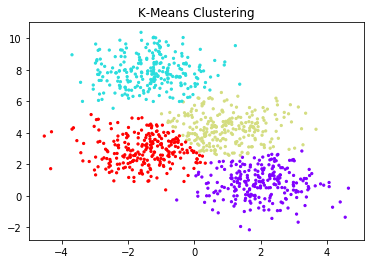

In [5]:
from sklearn.datasets.samples_generator import make_blobs
import pylab as plt
X, y = make_blobs(n_samples=1000, centers=4,
                  random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], s=5);
plt.show();

from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='rainbow');
plt.title(r'K-Means Clustering')
plt.show();

In [6]:
def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None):
    estimator.fit(X, y)

    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='rainbow')
    plt.clim(y.min(), y.max())

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
    plt.axis('off')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(y.min(), y.max())
    

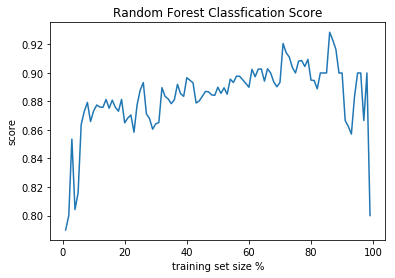

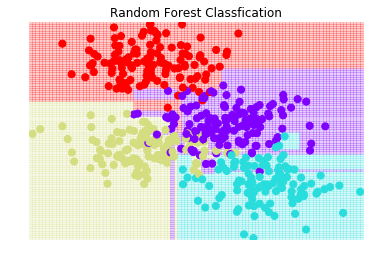

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'iris'], make sure the Graphviz executables are on your systems' PATH

In [7]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

'''
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

'''
from sklearn.model_selection import train_test_split
score_set={}
for trainsize in range (1,100,1):
    clf = DecisionTreeClassifier()
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=(100-trainsize)/100, random_state=0)
    clf.fit(x_train,y_train)
    score_set[trainsize]=score = clf.score(x_test, y_test)
    
plt.plot(score_set.keys(),score_set.values())


plt.ylabel("score")
plt.xlabel("training set size %") 
plt.title(r'Random Forest Classfication Score')

visualize_tree(clf, X[:500], y[:500], boundaries=False)
plt.title(r'Random Forest Classfication')
plt.show()

import graphviz # doctest: +SKIP
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("iris") 


dot_data = tree.export_graphviz(clf, out_file=None, 
                            feature_names=iris.feature_names, 
                            class_names=iris.target_names,  
                            filled=True, rounded=True,  
                            special_characters=True)  
graph = graphviz.Source(dot_data) 
graph
graph.show()

In [4]:
import graphviz # doctest: +SKIP
from sklearn import tree



graph # doctest: +SKIP

NameError: name 'clf' is not defined

AttributeError: 'RandomForestClassifier' object has no attribute 'show'